In [8]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd

Total articles for the disaster: 418
Selected articles: 192
Top 10 publishers:
 - OCHA: 45, (%16.79%)
 - WFP: 38, (%14.18%)
 - Logistics Cluster: 23, (%8.58%)
 - UNICEF: 19, (%7.09%)
 - UNHCR: 17, (%6.34%)
 - WHO: 17, (%6.34%)
 - IOM: 15, (%5.60%)
 - ETC: 12, (%4.48%)
 - Govt. Malawi: 10, (%3.73%)
 - USAID: 9, (%3.36%)
Top 10 publisher types:
 - International Organization: 207
 - Government: 33
 - Non-governmental Organization: 15
 - Red Cross/Red Crescent Movement: 10
 - Academic and Research Institution: 3


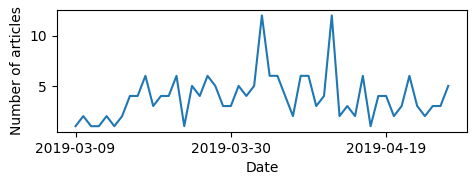

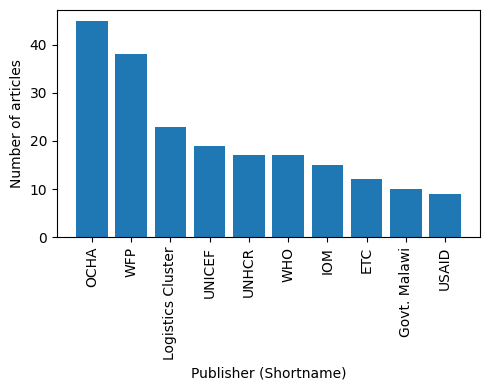

Average number of articles per day: 3.92
Top 2 days:
 - 2019-04-03: 12
   - Southern Africa – Tropical Cyclone Idai Fact Sheet #4, Fiscal Year (FY) 2019, April 3, 2019
   - UNICEF Malawi Humanitarian Situation Report - Flood Situation Report: No.3 (22-29 March 2019)
   - Mozambique: Cyclone Idai - ETC Situation Report #7 (Reporting Period: 01/04/2019 to 03/04/2019)
   - Mozambique Cyclone Idai Response: Situation Report No. 2, 30 March - 3 April 2019
   - Bulletin: Cholera and AWD Outbreaks in Eastern and Southern Africa, Regional Update for 2019 - as of 1 April 2019
   - UNFPA ESARO Sub-Regional Situation Report, Malawi - Mozambique - Zimbabwe, 29 March 2019
   - Malawi: Situation Update, 2 April 2019
   - Malawi — Tropical Cyclone Idai Multi-Sectoral Location Assessments: Chikwawa, ​Nsanje, Phalombe, And Zomba (2 April 2019)
   - Mozambique Cyclone Idai Response: Situation Report No. 1, 22 - 29 March 2019
   - Mozambique: Cyclone Idai & Floods Situation Report No. 1 (as of 2 April 20

In [9]:
app_name = "rwint-user-0"
disaster_id = "47733"
api_url = f"https://api.reliefweb.int/v1/reports?appname={app_name}"

payload = {
    "offset": 0,
    "limit": 0,  # Maximum that ReliefWeb allows is 1000
    "filter": {
        "conditions": [
            {"field": "disaster.id", "value": disaster_id},
            {"field": "format.id", "value": "10"},  # Only situation reports
        ],
        "operator": "AND",
    },
    "preset": "latest",
    "profile": "list",
}
# Post request
response = requests.post(api_url, json=payload, timeout=30)
response_json = response.json()

total_articles = response_json["totalCount"]

print(f"Total articles for the disaster: {total_articles}")

with open("cache/articles.json", "r") as f:
    articles = json.load(f)
    # Total articles
    print(f"Selected articles: {len(articles)}")


with open("data/articles_47733.json", "r") as f:
    articles = json.load(f)
    # Total articles
    publishers = {}
    publisher_types = {}
    for article in articles:
        sources = article["sources"]
        for source in sources:
            if source["shortname"] not in publishers:
                publishers[source["shortname"]] = 0
            publishers[source["shortname"]] += 1
            if source["type"]["name"] not in publisher_types:
                publisher_types[source["type"]["name"]] = 0
            publisher_types[source["type"]["name"]] += 1

    # Print top 10 publishers
    print("Top 10 publishers:")
    for publisher, count in sorted(publishers.items(), key=lambda x: x[1], reverse=True)[:10]:
        all_count = sum(publishers.values())
        print(f" - {publisher}: {count}, (%{count / all_count:.2%})")
    # Print top 10 publisher types
    print("Top 10 publisher types:")
    for publisher_type, count in sorted(publisher_types.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f" - {publisher_type}: {count}")


    # Plot a linegraph of the date distribution of results
    dates = {}
    for article in articles:
        # Get the date of the article
        date = article["date"]["created"]
        # Convert to date object
        date = date.split("T")[0]
        # Add to dictionary
        if date not in dates:
            dates[date] = 0
        dates[date] += 1

    # Sort the dates
    dates = dict(sorted(dates.items()))

    # Plot the dates 
    plt.figure(figsize=(5, 2))
    plt.plot(list(dates.keys()), list(dates.values()))
    plt.xticks(range(0, len(dates), 20), list(dates.keys())[::20])
    plt.xlabel("Date")
    plt.ylabel("Number of articles")
    plt.tight_layout()
    plt.savefig("figures/articleDateDistribution.png", bbox_inches='tight')
    plt.show()


    top_ten_publishers = dict(sorted(publishers.items(), key=lambda x: x[1], reverse=True)[:10])
    # Top ten sources histogram with shortnames
    plt.figure(figsize=(5, 4))
    plt.bar(top_ten_publishers.keys(), top_ten_publishers.values())
    plt.xticks(rotation=90)
    plt.xlabel("Publisher (Shortname)")
    plt.ylabel("Number of articles")
    plt.tight_layout()
    plt.savefig("figures/articlePublisherDistribution.png", bbox_inches='tight')
    plt.show()

    # Avarage number of articles per day
    total_days = len(dates)
    total_articles = sum(dates.values())
    avg_articles_per_day = total_articles / total_days
    print(f"Average number of articles per day: {avg_articles_per_day:.2f}")

    # Top 2 days 
    print("Top 2 days:")
    for date, count in sorted(dates.items(), key=lambda x: x[1], reverse=True)[:2]:
        print(f" - {date}: {count}")
        # Article titles on that date 
        for article in articles:
            if article["date"]["created"].split("T")[0] == date:
                print(f"   - {article['title']}")



Total organisations: 1820
Min value: 1, Key: ['Protection Cluster', 'Southern African Development Community', 'Food and Agriculture Organization of the United Nations', 'European Centre for Disease Prevention and Control', 'Zimbabwe Peace Project', 'International Food Policy Research Institute', 'Government of Türkiye']
Max value: 45, Key: ['United Nations Office for the Coordination of Humanitarian Affairs']
Sources: 30


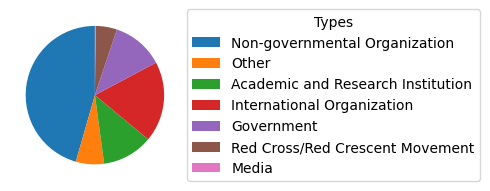

Percentage of each type:
 - Non-governmental Organization: 831 (45.56%)
 - Other: 120 (6.58%)
 - Academic and Research Institution: 216 (11.84%)
 - International Organization: 343 (18.80%)
 - Government: 220 (12.06%)
 - Red Cross/Red Crescent Movement: 91 (4.99%)
 - Media: 3 (0.16%)
Two examples from each type:
 - Non-governmental Organization:
   - The Pandora Project
   - Le Comité International pour l’Aide d’Urgence et le Développement Canada
 - Other:
   - Holm Akhdar Environmental Consultancy
   - Resource Associates Kenya Limited
 - Academic and Research Institution:
   - Ruff Institute of Global Homelessness
   - University of Turin
 - International Organization:
   - PSEA Network DRC
   - International Search and Rescue Advisory Group
 - Government:
   - International Energy Agency
   - China International Development Cooperation Agency
 - Red Cross/Red Crescent Movement:
   - Croix-Rouge de la RDC
   - Trinidad and Tobago Red Cross Society
 - Media:
   - Myanmar Peace Monitor


In [10]:
payload = {
    "filter": {"field": "status", "value": "active"},
    "preset": "latest",
    "profile": "list",
}
response = requests.post(
    "https://api.reliefweb.int/v1/sources?appname="
    + app_name
    + "&limit=0",
    json=payload,
    timeout=30,
)
response_json = response.json()

total_organisations = response_json["totalCount"]

print(f"Total organisations: {total_organisations}")

with open("data/articles_47733_with_organisations.json", "r") as f:
    articles = json.load(f)
    # Total organisations
    sources = {}
    for article in articles:
        sources_in_article = article["sources"]
        for source in sources_in_article:
            if source["longname"] not in sources:
                sources[source["longname"]] = 0
            sources[source["longname"]] += 1
    # Find min and max values and their keys
    min_value = min(sources.values())
    max_value = max(sources.values())
    min_key = [k for k, v in sources.items() if v == min_value]
    max_key = [k for k, v in sources.items() if v == max_value]
    print(f"Min value: {min_value}, Key: {min_key}")
    print(f"Max value: {max_value}, Key: {max_key}")
    print(f"Sources: {len(sources)}")


    # Reports by OCHA 
    """
    ocha_reports = []
    print("Reports by OCHA:")
    for article in articles:
        sources = article["sources"]
        for source in sources:
            if source["shortname"] == "OCHA":
                ocha_reports.append(article)
                print(f" - {article['title']}")
    """


    # Pie chart of the organisation types
    with open("data/organisations_with_types.json", "r") as f:
        organisation_types = json.load(f)
        res = {}
        for org in organisation_types.values():
            if org["type"]["name"] not in res:
                res[org["type"]["name"]] = 0
            res[org["type"]["name"]] += 1


        # Plot pie chart
        plt.figure(figsize=(5, 2))
        wedges, autotexts = plt.pie(
            res.values(),
            startangle=90,
        )
        plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.legend(wedges, res.keys(), title="Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.tight_layout()
        plt.savefig("figures/articleOrganisationTypes.png", bbox_inches='tight')
        plt.show()

        # Print percentage of each type
        print("Percentage of each type:")
        total = sum(res.values())
        for key, value in res.items():
            print(f" - {key}: {value} ({value / total:.2%})")

        # Two examples from each type with highest count
        print("Two examples from each type:")
        for key, value in res.items():
            print(f" - {key}:")
            count = 0
            for org in organisation_types.values():
                if org["type"]["name"] == key:
                    print(f"   - {org['name']}")
                    count += 1
                    if count == 2:
                        break
    avarage_orgs_per_article = {}
    for article in articles:
        orgs = article["organisations"]
        avarage_orgs_per_article[article["id"]] = len(orgs)
    # Avarage number of organisations per article
    total_orgs = sum(avarage_orgs_per_article.values())
    total_articles = len(avarage_orgs_per_article)
    avg_orgs_per_article = total_orgs / total_articles
    print(f"Average number of organisations per article: {avg_orgs_per_article:.2f}")



In [11]:
df = pd.read_csv("data/edges.csv")
print(f"Edges: {len(df)}")

Edges: 1153


/tmp/ipykernel_125324/1517634525.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


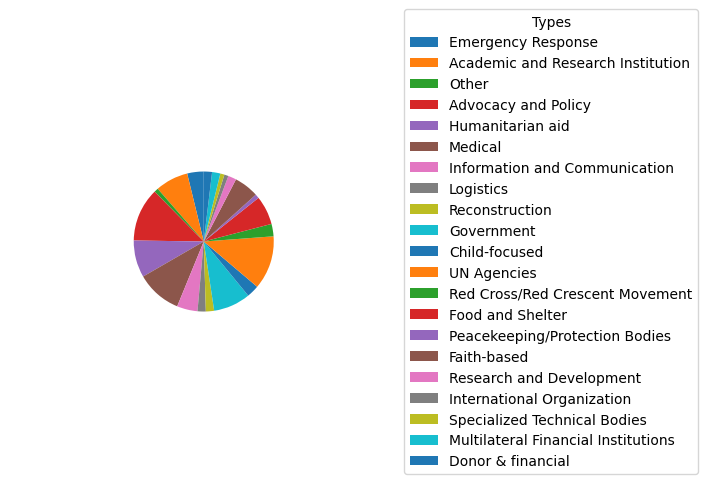

Amount of different types:
 - Total: 21


In [12]:

with open("data/organisations_with_types_reassigned.json", "r") as f:
    organisation_types = json.load(f)
    res = {}
    for org in organisation_types.values():
        if org["type"]["name"] not in res:
            res[org["type"]["name"]] = 0
        res[org["type"]["name"]] += 1


    # Plot pie chart
    plt.figure(figsize=(5, 2))
    wedges, autotexts = plt.pie(
        res.values(),
        startangle=90,
    )
    plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(wedges, res.keys(), title="Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()
    plt.savefig("figures/articleOrganisationTypesReassigned.png", bbox_inches='tight')
    plt.show()

    # Print amount of different types 
    print("Amount of different types:")
    total = len(res)
    print(f" - Total: {total}")


